## __Voting Classifier__

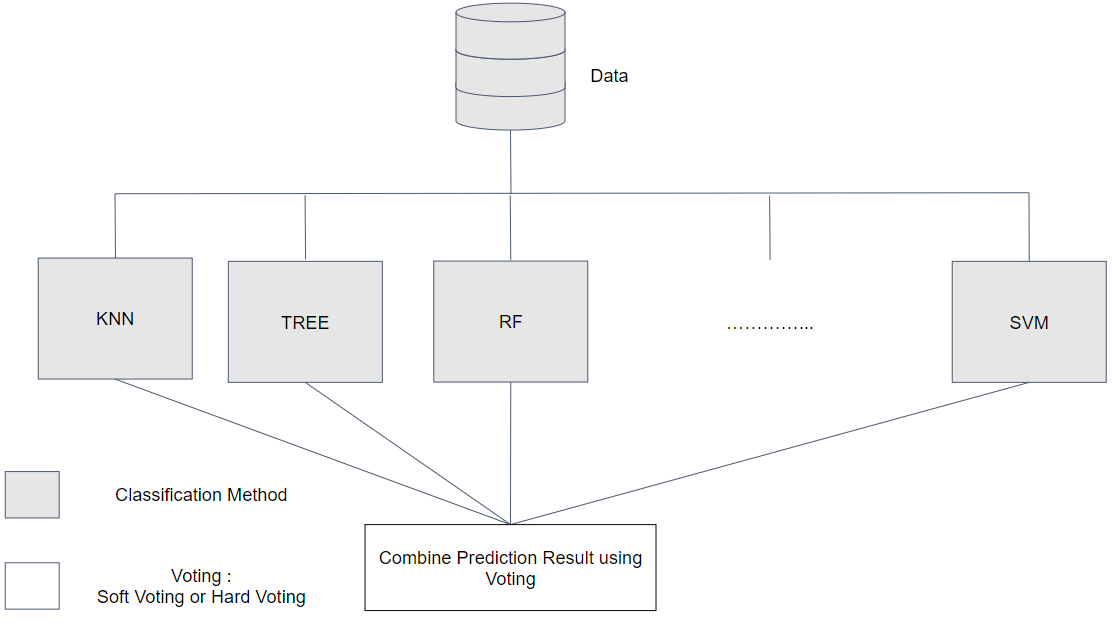

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report

In [2]:
wine = pd.read_csv('white_wine.csv')

In [3]:
wine['alcohol'].fillna(wine['alcohol'].mean(), inplace=True) # data leakage
wine['label'] = np.where(wine['quality']>6, 1, 0)
X = wine[['alcohol', 'density']]
y = wine['label']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=2020)

In [5]:
lr = LogisticRegression()
dtc = DecisionTreeClassifier(max_depth=5)
knn = KNeighborsClassifier(n_neighbors = 3)

In [6]:
for clfs, clf_name in zip([lr, dtc, knn], ['Logistic Regression', 'Decision Tree Classifier', 'K-Nearest Neighbors']):
    clfs.fit(X_train, y_train)
    y_pred = clfs.predict(X_test)
    print(clf_name+':')
    print(classification_report(y_test, y_pred))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        84
           1       0.75      0.45      0.56        20

    accuracy                           0.87       104
   macro avg       0.82      0.71      0.74       104
weighted avg       0.86      0.87      0.85       104

Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        84
           1       1.00      0.90      0.95        20

    accuracy                           0.98       104
   macro avg       0.99      0.95      0.97       104
weighted avg       0.98      0.98      0.98       104

K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        84
           1       0.75      0.75      0.75        20

    accuracy                           0.90       104
   macro avg       0.85      0.85      0.85       104
weight

In [7]:
vc = VotingClassifier([('clf2', dtc), ('clf3', knn)], voting='soft')

In [8]:
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('clf2', DecisionTreeClassifier(max_depth=5)),
                             ('clf3', KNeighborsClassifier(n_neighbors=3))],
                 voting='soft')

In [9]:
y_pred = vc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        84
           1       1.00      0.85      0.92        20

    accuracy                           0.97       104
   macro avg       0.98      0.93      0.95       104
weighted avg       0.97      0.97      0.97       104



> ## Modelling Improvement

In [13]:
lr = LogisticRegression(solver='liblinear', C=0.01)
lr_poly = PolynomialFeatures(degree=3, include_bias=False)
pipe_lr = Pipeline([('poly', lr_poly), ('clf', lr)])

dt = DecisionTreeClassifier(max_depth=5, min_samples_split=10)

knn = KNeighborsClassifier(n_neighbors=3)
pipe_knn = Pipeline([('scaler', StandardScaler()), ('clf', knn)])

In [14]:
for clfs, clf_name in zip([pipe_lr, dtc, pipe_knn], ['Logistic Regression', 'Decision Tree Classifier', 'K-Nearest Neighbors']):
    clfs.fit(X_train, y_train)
    y_pred = clfs.predict(X_test)
    print(clf_name+':')
    print(classification_report(y_test, y_pred))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        84
           1       0.75      0.45      0.56        20

    accuracy                           0.87       104
   macro avg       0.82      0.71      0.74       104
weighted avg       0.86      0.87      0.85       104

Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        84
           1       1.00      0.90      0.95        20

    accuracy                           0.98       104
   macro avg       0.99      0.95      0.97       104
weighted avg       0.98      0.98      0.98       104

K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        84
           1       0.95      0.95      0.95        20

    accuracy                           0.98       104
   macro avg       0.97      0.97      0.97       104
weight

In [15]:
vc_improve = VotingClassifier([('clf1', pipe_lr), ('clf2', dtc), ('clf3',pipe_knn)], voting='soft')
vc_improve.fit(X_train, y_train)

VotingClassifier(estimators=[('clf1',
                              Pipeline(steps=[('poly',
                                               PolynomialFeatures(degree=3,
                                                                  include_bias=False)),
                                              ('clf',
                                               LogisticRegression(C=0.01,
                                                                  solver='liblinear'))])),
                             ('clf2', DecisionTreeClassifier(max_depth=5)),
                             ('clf3',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('clf',
                                               KNeighborsClassifier(n_neighbors=3))]))],
                 voting='soft')

In [16]:
y_pred_improve = vc_improve.predict(X_test)
print(classification_report(y_test, y_pred_improve))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        84
           1       1.00      0.90      0.95        20

    accuracy                           0.98       104
   macro avg       0.99      0.95      0.97       104
weighted avg       0.98      0.98      0.98       104



> ## Repeat "Model Base" and "Model Improvement" using hard voting

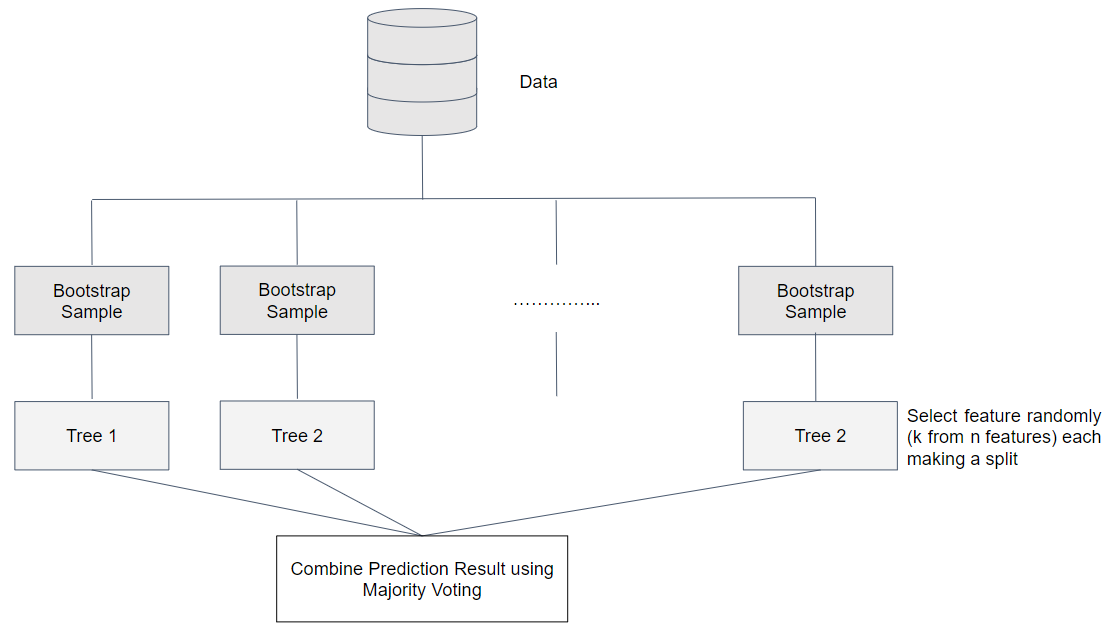

In [18]:
bankloan = pd.read_csv('bankloan.csv')
bankloan.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [19]:
fitur = ['age', 'employ', 'debtinc', 'creddebt', 'othdebt']
target = ['default']

> ## Data Splitting

In [20]:
X = bankloan[fitur]
y = bankloan[target]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify=y,
    test_size =.2,
    random_state = 2020
)

> ## Modelling

In [35]:
rf = RandomForestClassifier(n_estimators=20, max_features = 4, max_depth=3, oob_score=True, random_state=2020)
rf.fit(X_train, y_train)

C:\Users\R7891\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(max_depth=3, max_features=4, n_estimators=20,
                       oob_score=True, random_state=2020)

In [36]:
y_pred_rf = rf.predict(X_test)

In [37]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86       103
           1       0.69      0.30      0.42        37

    accuracy                           0.78       140
   macro avg       0.74      0.62      0.64       140
weighted avg       0.76      0.78      0.74       140



In [38]:
rf.oob_score_

0.7857142857142857

> ## Decision Boundary

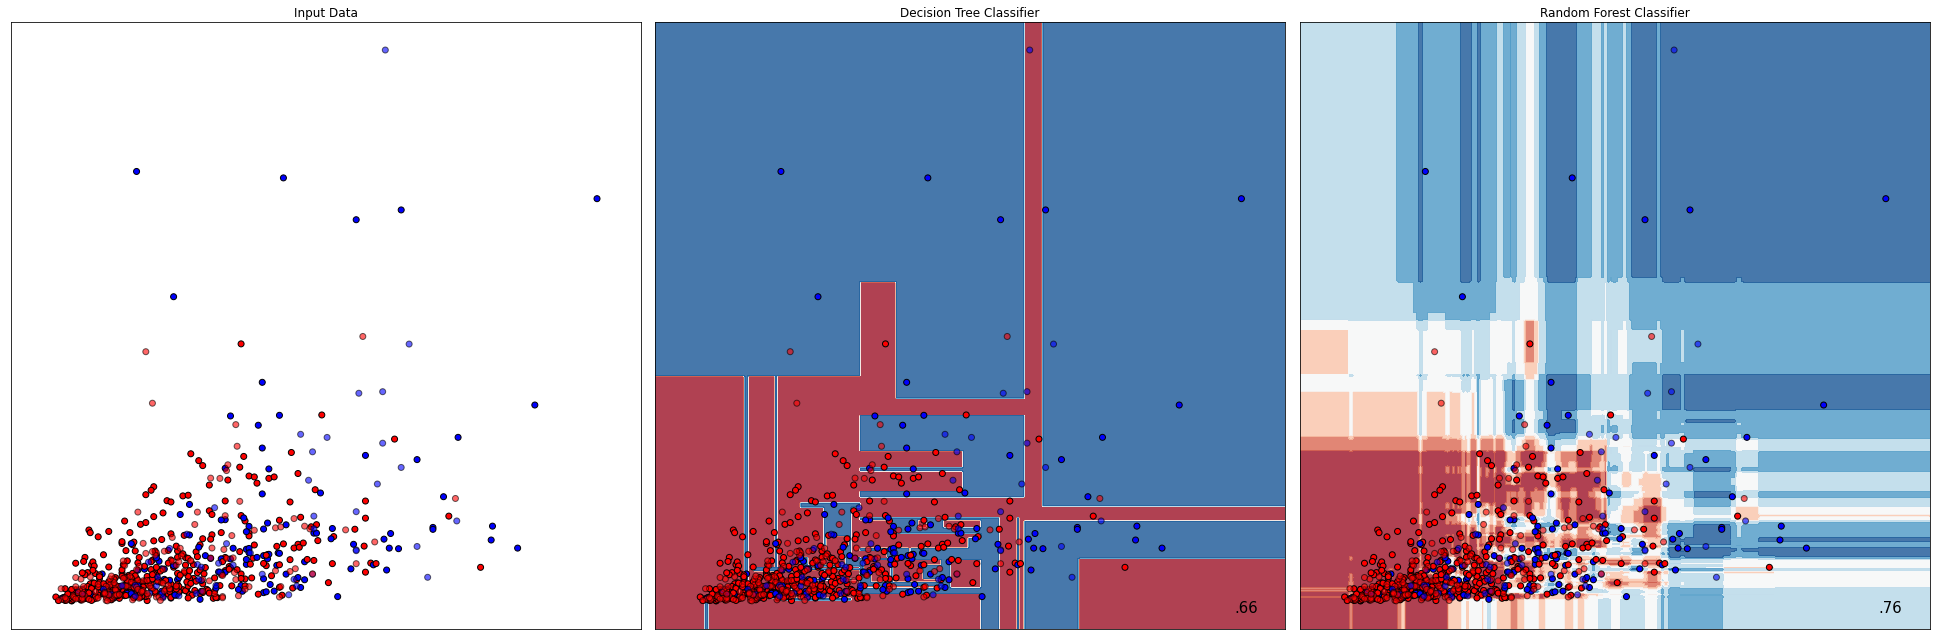

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

h = .02

names = ['Decision Tree Classifier', 'Random Forest Classifier']

classifiers = [DecisionTreeClassifier(), RandomForestClassifier(n_estimators=20)]

X = bankloan[['debtinc', 'creddebt']]
y = bankloan['default']

linearly_separable = (X, y)

datasets = [
    linearly_separable
]

figure = plt.figure(figsize=(27,9))
i = 1

# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title('Input Data')
        
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i+=1
        
        
# itterates over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        
        # plot decision boundary
        if hasattr(clf, 'decision_function'):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
            
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
        
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.6)
        
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right')
        i += 1
        
plt.tight_layout()
plt.show()
        

## __BOOSTING__

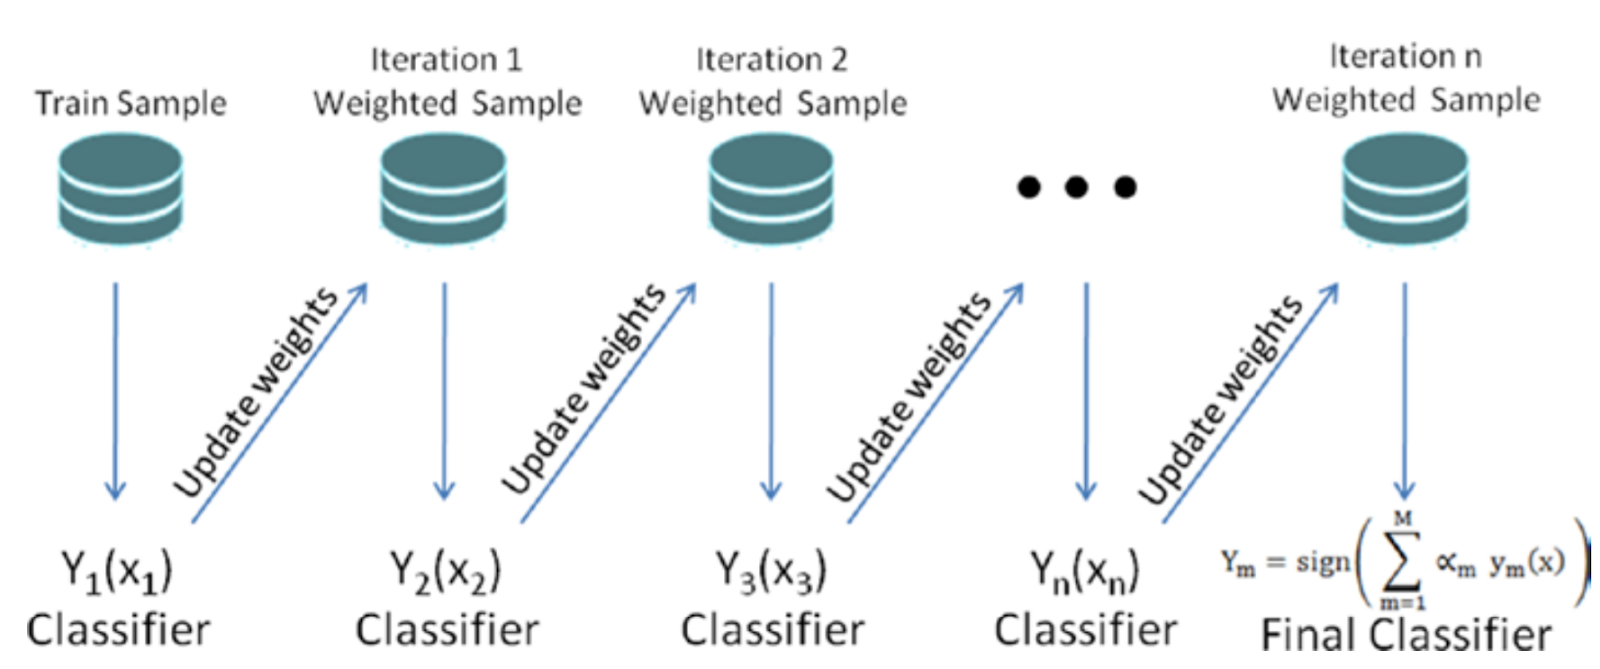

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.
<br>
Fields:
<br>
The dataset contains 16 columns
<br>
Target filed: Income
<br>
-- The income is divide into two classes: 50K
<br>
Number of attributes: 14
<br>
-- These are the demographics and other 
<br>
features to describe a person

We will explore the possibility in predicting income level based on the individual’s personal information.

In [47]:
adult = pd.read_csv('adult.csv')

In [48]:
adult.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [49]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [50]:
adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [53]:
adult.replace('?', np.nan, inplace=True)

In [54]:
adult.isna().sum()/len(adult)*100

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    1.790486
income            0.000000
dtype: float64

<AxesSubplot:>

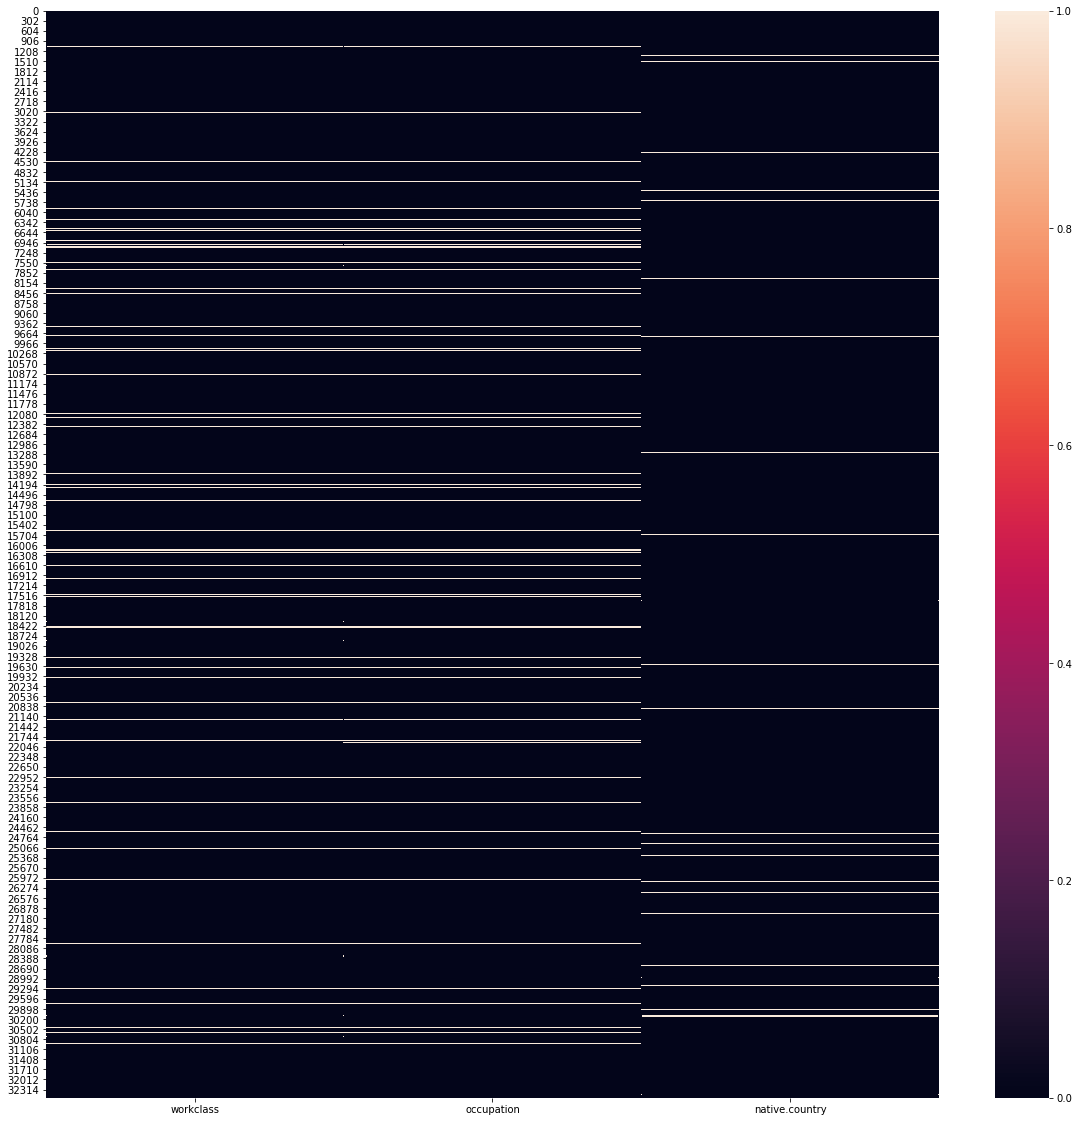

In [55]:
plt.figure(figsize=(20,20))
sns.heatmap(adult['workclass occupation native.country'.split()].isna())

In [56]:
adult.describe(include= object)

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


preprocess scheme:
1. one hot encoding : relationship, race, sex
1. binary encoding : workclass, marital status, occupation, native country  
1. ordinal encoding : education (already encoded)
1. no treatment : size

out:
1. fnlwgt

In [57]:
binary_encoder_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='NC')),
    ('binary_encoder', ce.BinaryEncoder())
])

transformer = ColumnTransformer([
    ('one_hot', OneHotEncoder(drop='first'), ['relationship', 'race', 'sex']),
    ('binary', binary_encoder_pipeline, ['workclass', 'marital.status', 'occupation', 'native.country'])
], remainder='passthrough')

## __Data Splitting__

In [58]:
X = adult.drop(columns = ['fnlwgt', 'income', 'education'])
y = np.where(adult['income']=='>50K', 1, 0)

In [59]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, stratify=y, random_state=10)

## __Data Transformation__

In [60]:
X_train_val_preprocessed = transformer.fit_transform(X_train_val)
X_test_preprocessed = transformer.transform(X_test)

In [61]:
X_train_val_preprocessed = pd.DataFrame(X_train_val_preprocessed)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed)
X_train_val_preprocessed

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,63.0,9.0,0.0,0.0,40.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,47.0,13.0,0.0,0.0,40.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,90.0,4.0,0.0,0.0,40.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,64.0,9.0,7298.0,0.0,45.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,33.0,13.0,0.0,0.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24415,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,25.0,10.0,0.0,0.0,35.0
24416,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,51.0,15.0,3325.0,0.0,40.0
24417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,60.0,11.0,0.0,0.0,40.0
24418,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,23.0,10.0,0.0,0.0,30.0


In [62]:
transformer.transformers_

[('one_hot', OneHotEncoder(drop='first'), ['relationship', 'race', 'sex']),
 ('binary',
  Pipeline(steps=[('imputer',
                   SimpleImputer(fill_value='NC', strategy='constant')),
                  ('binary_encoder', BinaryEncoder())]),
  ['workclass', 'marital.status', 'occupation', 'native.country']),
 ('remainder', 'passthrough', [0, 2, 8, 9, 10])]

In [65]:
transformer.transformers_[0][1].get_feature_names()

array(['x0_Not-in-family', 'x0_Other-relative', 'x0_Own-child',
       'x0_Unmarried', 'x0_Wife', 'x1_Asian-Pac-Islander', 'x1_Black',
       'x1_Other', 'x1_White', 'x2_Male'], dtype=object)

In [68]:
transformer.transformers_[1][1]['binary_encoder'].get_feature_names()

['0_0',
 '0_1',
 '0_2',
 '0_3',
 '0_4',
 '1_0',
 '1_1',
 '1_2',
 '1_3',
 '2_0',
 '2_1',
 '2_2',
 '2_3',
 '2_4',
 '3_0',
 '3_1',
 '3_2',
 '3_3',
 '3_4',
 '3_5',
 '3_6']

In [69]:
features = list(transformer.transformers_[0][1].get_feature_names()) + transformer.transformers_[1][1]['binary_encoder'].get_feature_names() + ['age','education.num','capital.gain','capital.loss','hours.per.week']
X_train_val_preprocessed.columns = features
X_test_preprocessed.columns = features
X_train_val_preprocessed

,x0_Not-in-family,x0_Other-relative,x0_Own-child,x0_Unmarried,x0_Wife,x1_Asian-Pac-Islander,x1_Black,x1_Other,x1_White,x2_Male,...,3_2,3_3,3_4,3_5,3_6,age,education.num,capital.gain,capital.loss,hours.per.week
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,63.0,9.0,0.0,0.0,40.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,47.0,13.0,0.0,0.0,40.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,90.0,4.0,0.0,0.0,40.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,64.0,9.0,7298.0,0.0,45.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,33.0,13.0,0.0,0.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24415,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,25.0,10.0,0.0,0.0,35.0
24416,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,51.0,15.0,3325.0,0.0,40.0
24417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,60.0,11.0,0.0,0.0,40.0
24418,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,23.0,10.0,0.0,0.0,30.0


## __Model Fitting and Evaluation: Decision Tree__

In [70]:
dtc = DecisionTreeClassifier(max_depth=3) # benchmark
dtc.fit(X_train_val_preprocessed, y_train_val)

DecisionTreeClassifier(max_depth=3)

In [71]:
y_pred = dtc.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      6181
           1       0.68      0.53      0.59      1960

    accuracy                           0.83      8141
   macro avg       0.77      0.72      0.74      8141
weighted avg       0.82      0.83      0.82      8141



In [72]:
importance_table = pd.DataFrame({
    'imp': dtc.feature_importances_
}, index=features)

In [73]:
importance_table

,imp
x0_Not-in-family,0.000000
x0_Other-relative,0.000000
x0_Own-child,0.000000
x0_Unmarried,0.000000
x0_Wife,0.000000
x1_Asian-Pac-Islander,0.000000
x1_Black,0.000000
x1_Other,0.000000
x1_White,0.000000
x2_Male,0.000000


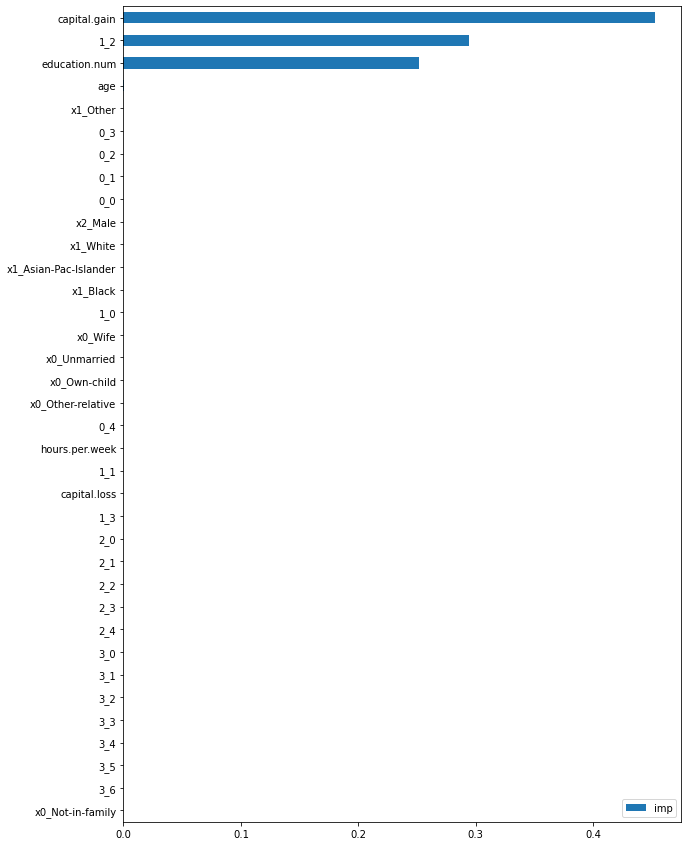

In [75]:
importance_table.sort_values(by='imp').plot(kind='barh', figsize=(10,15))
plt.legend(loc='lower right')

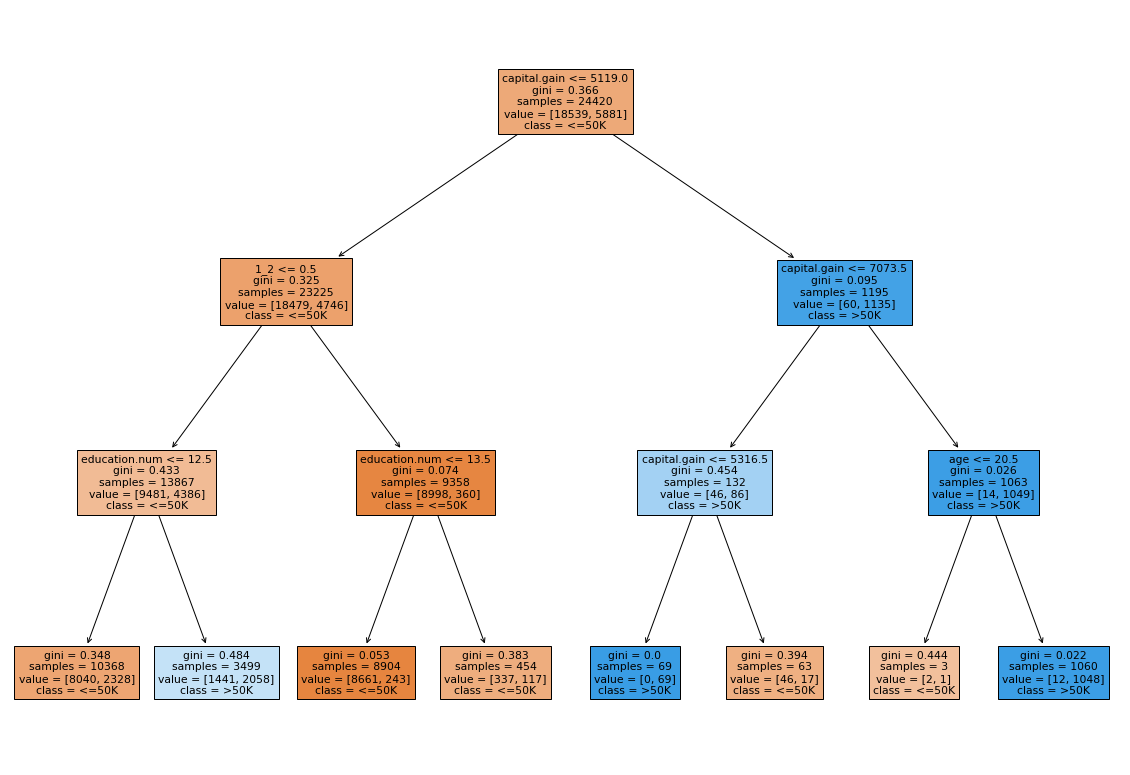

In [76]:
plt.figure(figsize=(20,14))
plot_tree(dtc, feature_names = features, filled = True, class_names=['<=50K', '>50K'])
plt.show()

## __Model Fitting and Evaluation : Adaptive Boosting__

In [77]:
tree = DecisionTreeClassifier(max_depth=3)
adaboost = AdaBoostClassifier(tree, n_estimators=200, learning_rate=0.1, random_state=10)

adaboost.fit(X_train_val_preprocessed, y_train_val)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.1, n_estimators=200, random_state=10)

In [78]:
y_pred_ada = adaboost.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      6181
           1       0.78      0.63      0.70      1960

    accuracy                           0.87      8141
   macro avg       0.84      0.79      0.81      8141
weighted avg       0.86      0.87      0.86      8141



In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      6181
           1       0.68      0.53      0.59      1960

    accuracy                           0.83      8141
   macro avg       0.77      0.72      0.74      8141
weighted avg       0.82      0.83      0.82      8141



In [83]:
adaboost.estimators_[:5]

[DecisionTreeClassifier(max_depth=3, random_state=1165313289),
 DecisionTreeClassifier(max_depth=3, random_state=1283169405),
 DecisionTreeClassifier(max_depth=3, random_state=89128932),
 DecisionTreeClassifier(max_depth=3, random_state=2124247567),
 DecisionTreeClassifier(max_depth=3, random_state=574014784)]

In [87]:
adaboost.estimator_errors_[:5]

array([0.17031122, 0.19432323, 0.20578292, 0.24028166, 0.28190852])

In [88]:
importance_table_ada = pd.DataFrame({
    'imp': adaboost.feature_importances_
}, index=features)

<AxesSubplot:>

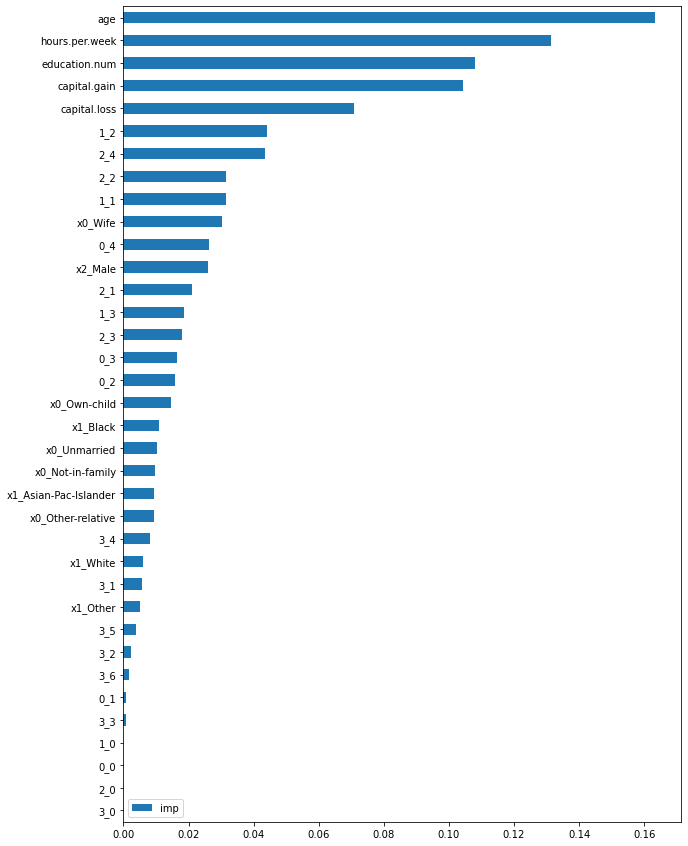

In [91]:
importance_table_ada.sort_values('imp').plot(kind='barh', figsize=(10,15))

## __Model Fitting and evaluation : Gradient Boosting__

In [92]:
gbc = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=10
)

gbc.fit(X_train_val_preprocessed, y_train_val)

GradientBoostingClassifier(n_estimators=200, random_state=10)

In [93]:
y_pred_gbc = gbc.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred_gbc))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      6181
           1       0.79      0.61      0.69      1960

    accuracy                           0.87      8141
   macro avg       0.84      0.78      0.80      8141
weighted avg       0.86      0.87      0.86      8141

